In [127]:
%load_ext autoreload
%autoreload 2
#This code is for a SSH 1D CROW network.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from matplotlib.pyplot import figure
import math as m
from segment import Segment
from func import *
import matplotlib.ticker as ticker

In [129]:
# NUM_PORTS = 4
SIZE = 100
imp0 = 377
xs0 = 50  # source position for the segment 0
tau = 0.9 #alternate couplings for SSH lattice
# kappa = 1j* m.sqrt(1-tau**2) # not working yet for complex number

maxTime = 50000

rings_no = 3   #out of N rings defined, 2 will be the input and output port (the first segment will have the source as the only connection; the last segment is redundant, the second last segment will act as the drop port.)
N_seg = rings_no*2

sources = Sources(rings_no)  #working for any number of rings
couplings = Couplings(rings_no, tau)

print(sources)
print(couplings)

ez_tab = np.zeros([N_seg, maxTime, SIZE], dtype=complex)

[[-1 -1]
 [ 0  3]
 [ 3  0]
 [ 2  5]
 [ 5  2]
 [-2 -2]]
[[0.9+0.j         0. +0.43588989j]
 [0.9+0.j         0. +0.43588989j]
 [0.9+0.j         0. +0.43588989j]
 [0.9+0.j         0. +0.43588989j]
 [0.9+0.j         0. +0.43588989j]
 [0.9+0.j         0. +0.43588989j]]


In [130]:
points_per_lambda = 50
c = 2.99792e8 #m/s
lambda0 = 500e-9 #500nm in the optical range
f0 = c/lambda0 #carrier frequency (resoanant frequency)
del_x = lambda0/points_per_lambda #spatial step (want 20 grid points per wavelength)
S = 0.99 #Courant number
del_t = (S * del_x)/c

N_space = SIZE #spatial domain length
L = del_x * (N_space - 1) #total spatial length 

N_time = maxTime #temporal domain length
T_total = N_time * del_t #total simulated time

N_cycle = T_total * f0 #total number of cycles

Nyq = 1/(2*f0) #Nyquist number (del_t must be smaller than this for proper sampling)

if del_t < Nyq:
    print("Possible")
    s2 = []
    for qTime in range(maxTime):
        signal = cw2(qTime, del_t, f0)
        s2.append(signal)
        
print(del_t)
print(f0)

Possible
3.3022895874472967e-17
599584000000000.0


range(0, 50000)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


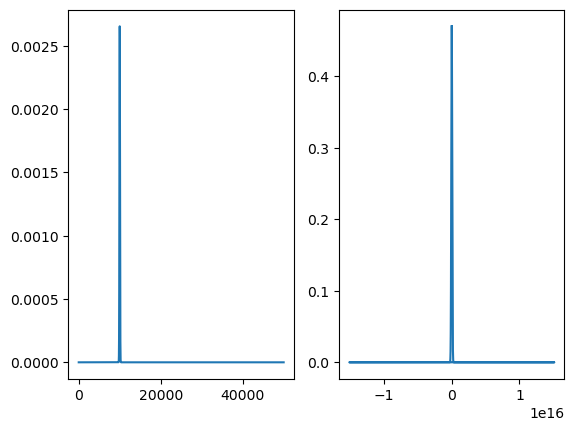

In [131]:
#Printing input signals
gauss = []
cont = []
print(range(maxTime))

for qTime in range(maxTime):
    g = gaussian(qTime, maxTime)
    print(g)
    conti = cw(qTime)
    gauss.append(g)
    cont.append(conti)
print(np.shape(gauss))
print(gauss)


# if del_t < Nyq:
#     print("Possible")
#     s2 = []
#     for qTime in range(maxTime):
#         signal = cw2(qTime, del_t, f0)
#         s2.append(signal)
#     figure(figsize=(20,10), dpi=80)
#     plt.subplot(1,2,1)
#     plt.plot(s2)

fft_vals = np.abs(np.fft.fft(gauss))
N = len(gauss)
freqs = np.fft.fftfreq(N, d = del_t)
plt.subplot(1,2,1)
plt.plot(gauss)
plt.subplot(1,2,2)
plt.plot(freqs, np.abs(fft_vals))

plt.show()
# plt.subplot(2,1,2)

# plt.plot(cont)
# plt.show()




In [132]:
f_array = []

s_tab = np.zeros(maxTime, dtype=complex)

for ii in range(N_seg):
    f = Segment(SIZE)
    f_array.append(f)
# print(f_array)

lambda0 = 500e-9 
f_center = 3e8/lambda0
sigma_pulse = 3e-15 

print("freq. Hz", f_center) 


for qTime in range(maxTime):
    s = gaussian(qTime, maxTime) 
    s_tab[qTime] = s
    
    for ii in range(N_seg):
        s1 = sources[ii][0]
        s2 = sources[ii][1]
        tau_ = couplings[ii][0]
        kappa_ = couplings[ii][1]
        
        xs = xs0
        if (sources[ii][0] == -1):
            s_new = s   
            xs = xs0
        elif (sources[ii][0] == -2):
            s_new = 0. 
        else:
            s_new = tau_*f_array[s1].ez[-1] + kappa_*f_array[s2].ez[-1]
            xs = 2  
            
        # print(s_new)
        
        f_array[ii].hy_update()
        f_array[ii].hy_sources(s_new,xs)
        f_array[ii].ez_update()
        f_array[ii].ez_sources(s_new,xs)
        

        ez_tab[ii,qTime,:] = f_array[ii].ez[:]   

for ii in range(N_seg):
    filename = f"data/ez_tab_ssh{ii:04d}.csv"  # e.g., ez_tab_0000.txt, ez_tab_0001.txt, ...
    np.savetxt(filename, ez_tab[ii, :, :], delimiter=",")

freq. Hz 600000000000000.0


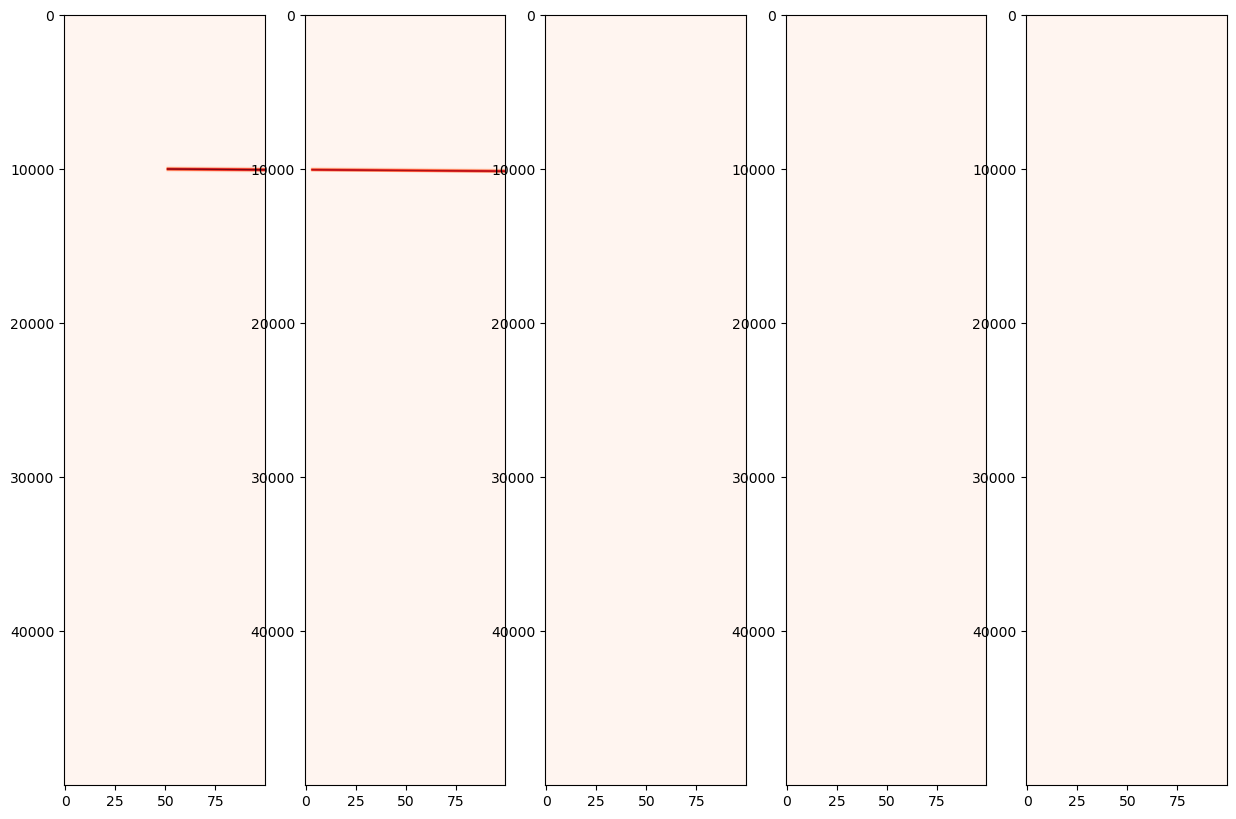

In [133]:
f, ax = plt.subplots(1,N_seg-1, figsize=(15,10)) 

vmax_val = np.max(np.real(ez_tab[0,:,:]))

for ii in range(N_seg-1):
    ax[ii].imshow(np.real(ez_tab[ii,:,:]), aspect='auto', vmin = 0, vmax = vmax_val , cmap = 'Reds')

In [134]:
Ez = np.zeros((maxTime-1,N_seg), dtype=complex)
# yf = np.zeros((maxTime-1,N_seg), dtype=complex)
windowed_signal = np.zeros((maxTime-1,N_seg), dtype=complex)
spectrum = np.zeros((maxTime-1, N_seg), dtype=complex)

for ii in range(N_seg):
    filename = f"data/ez_tab_ssh{ii:04d}.csv"
    df = pd.read_csv(filename)
    # print(df.shape)
    Ez[:,ii] = df.iloc[:,60]   #all rows of the 10th spatial point
    N = len(Ez[:,0])
    Ez[:,ii] -= np.mean(Ez[:,ii])
    
    # yf[:,ii] = np.abs(np.fft.fft(Ez[:,ii]))
    # dt = 1e-15    # your time step [s] (adjust to your simulation)

    # Apply Hann window
    # Ez[:,ii] = Ez[:,ii] - np.mean(Ez[:,ii])  #subtracting the average
    window = np.hanning(N)
    windowed_signal[:,ii] = Ez[:,ii] * window
    
    fft_vals = np.fft.fft(windowed_signal[:,ii])
    fft_vals = fft_vals / N #normalising by the number of samples
    spectrum[:, ii] = fft_vals   # store in column

    
freqs = np.fft.fftfreq(N, del_t)
# print(mask)
# Only keep positive frequencies
mask = freqs >= 0
freqs = freqs[mask]
spectrum = np.abs(spectrum[mask,:])

# for ii in range(N_seg):

#     plt.plot(freqs, np.abs(spectrum[:,ii]/spectrum[:,0]))
#     plt.xlim(0, 4e14)
#     # plt.semilogy()
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Amplitude")
#     plt.title("FFT with Hann Window")
#     plt.show()
    
    # print("Min:", np.min(Ez[:,ii]), "Max:", np.max(Ez[:,ii]))

    
    #accessing particular columns - all elements(all time steps for a particular spatial coordinate.)
# x = range(len(df.iloc[0,:])) 
# print(x)   





# Plot
# for ii in range(N_seg - 1):
#     plt.plot(freqs, spectrum)
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Amplitude")
#     plt.title("FFT with Hann Window")
#     plt.show()


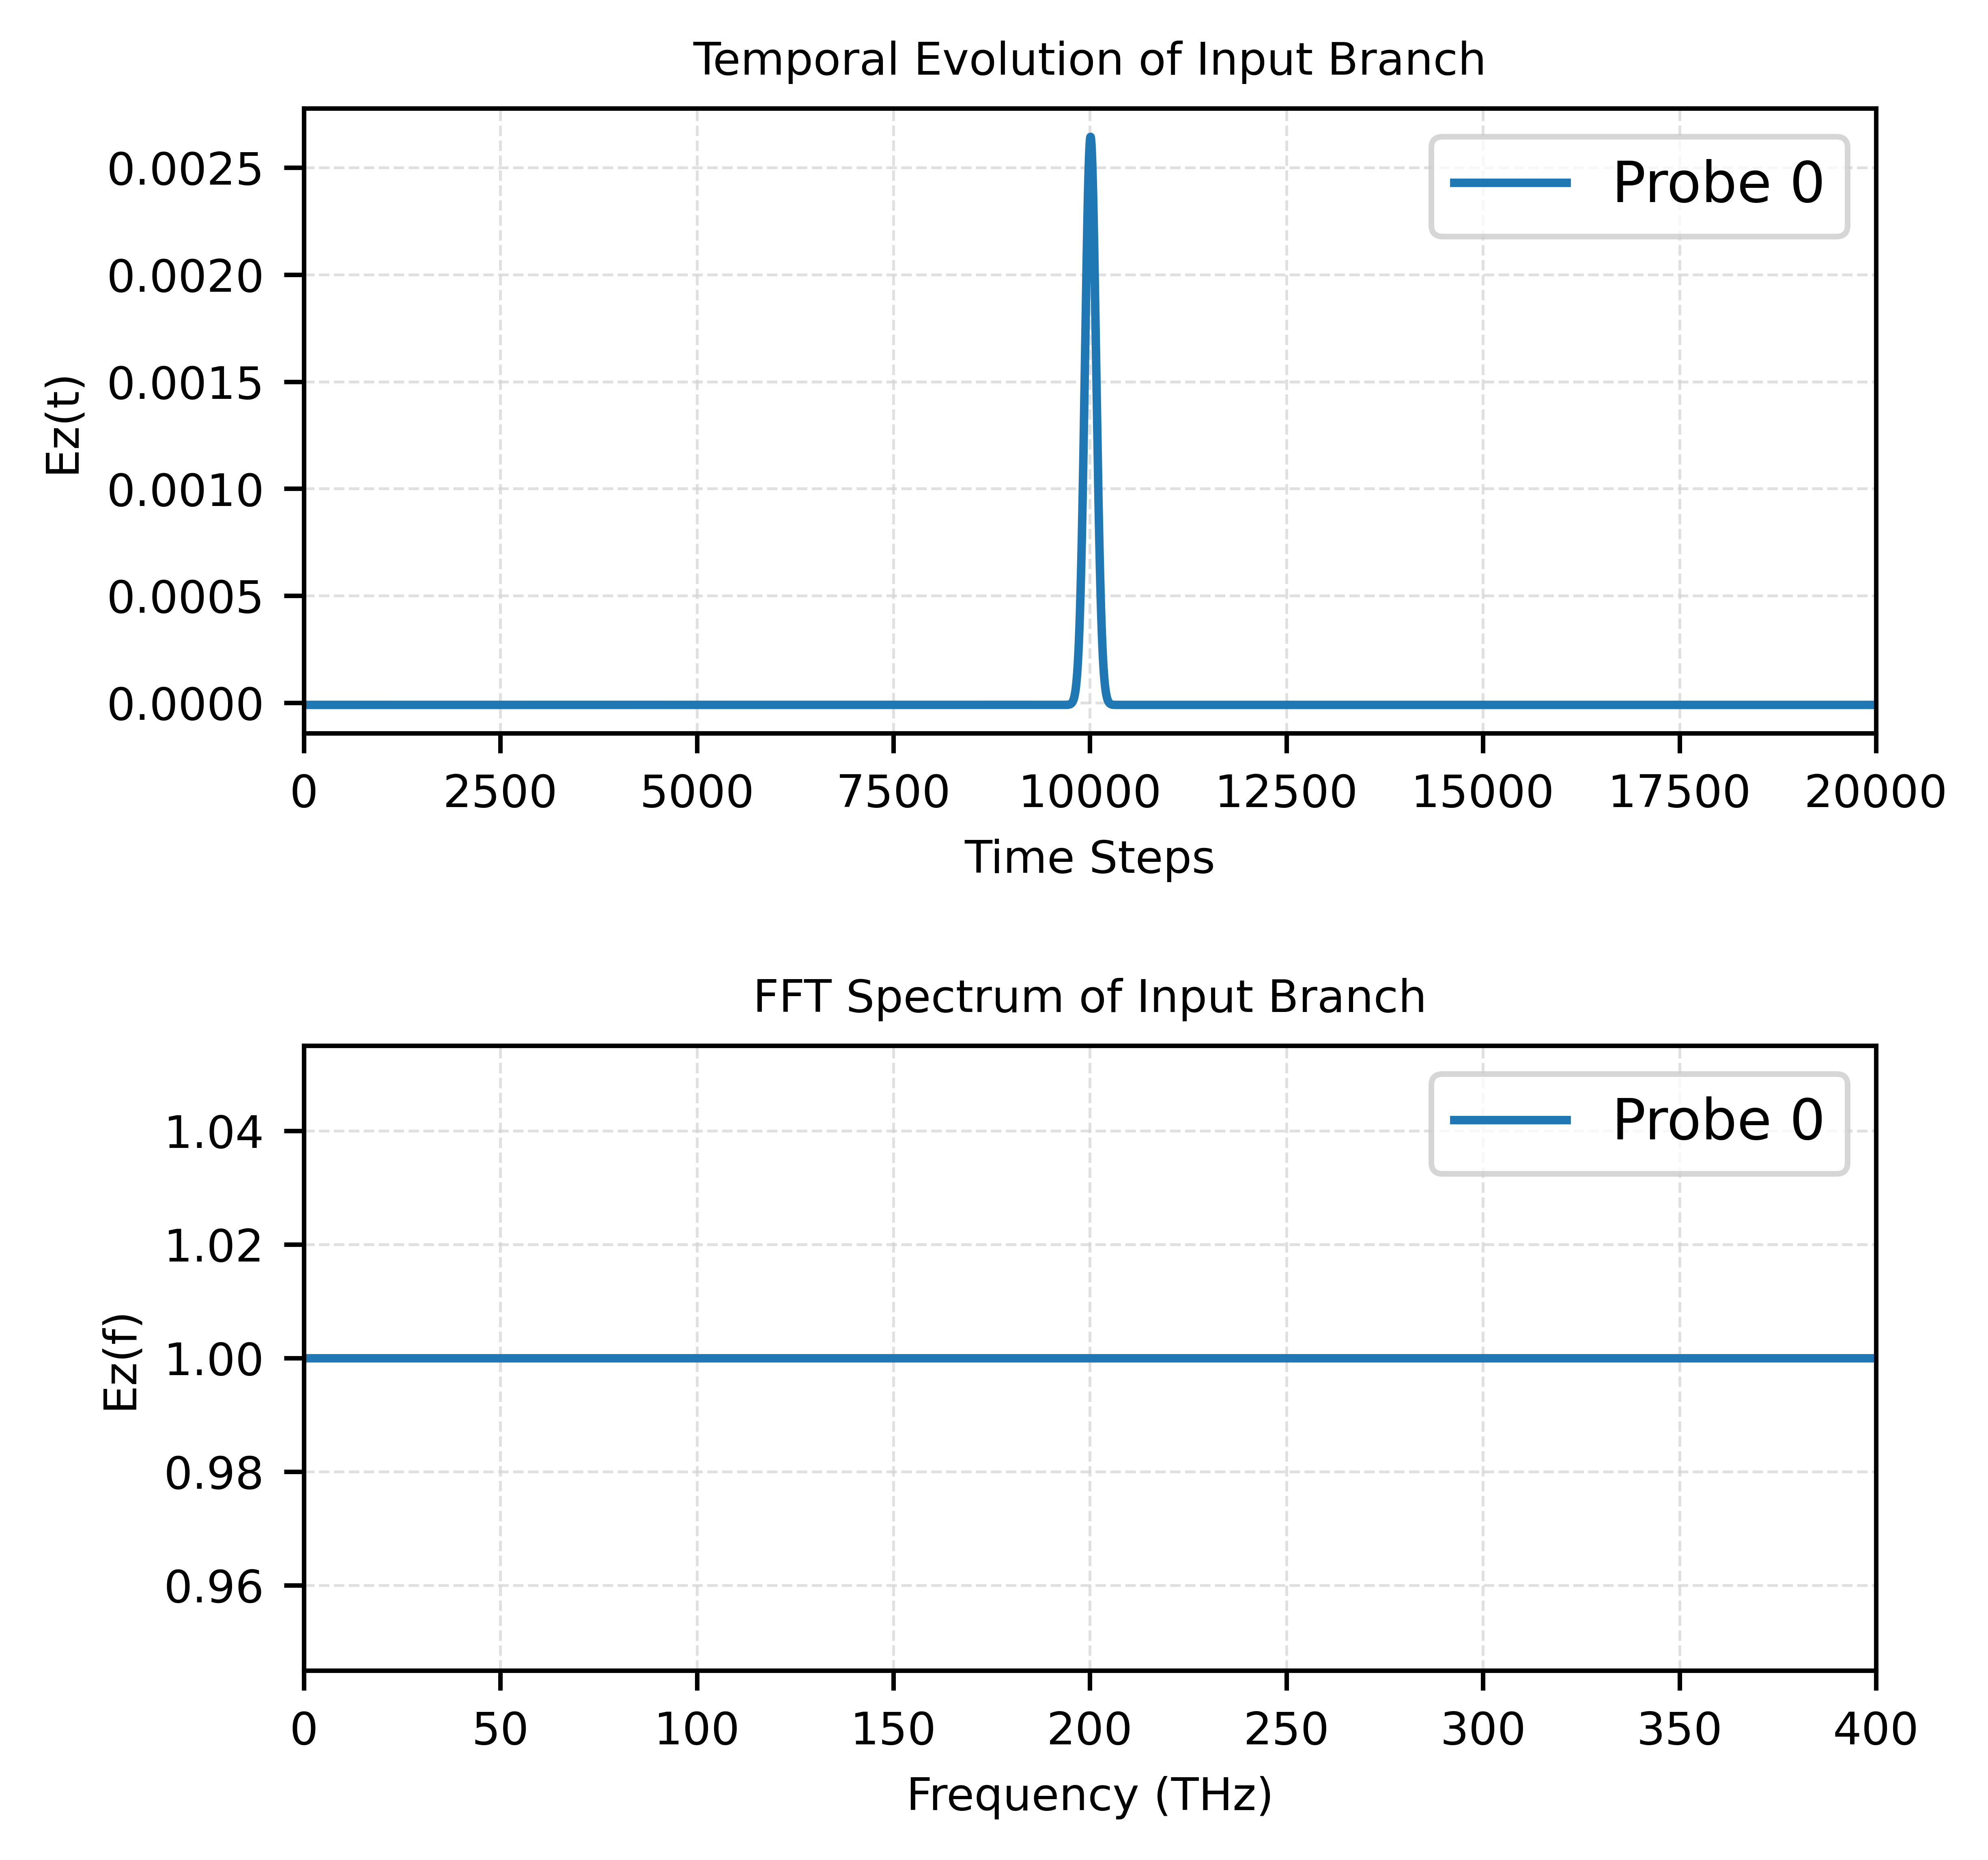

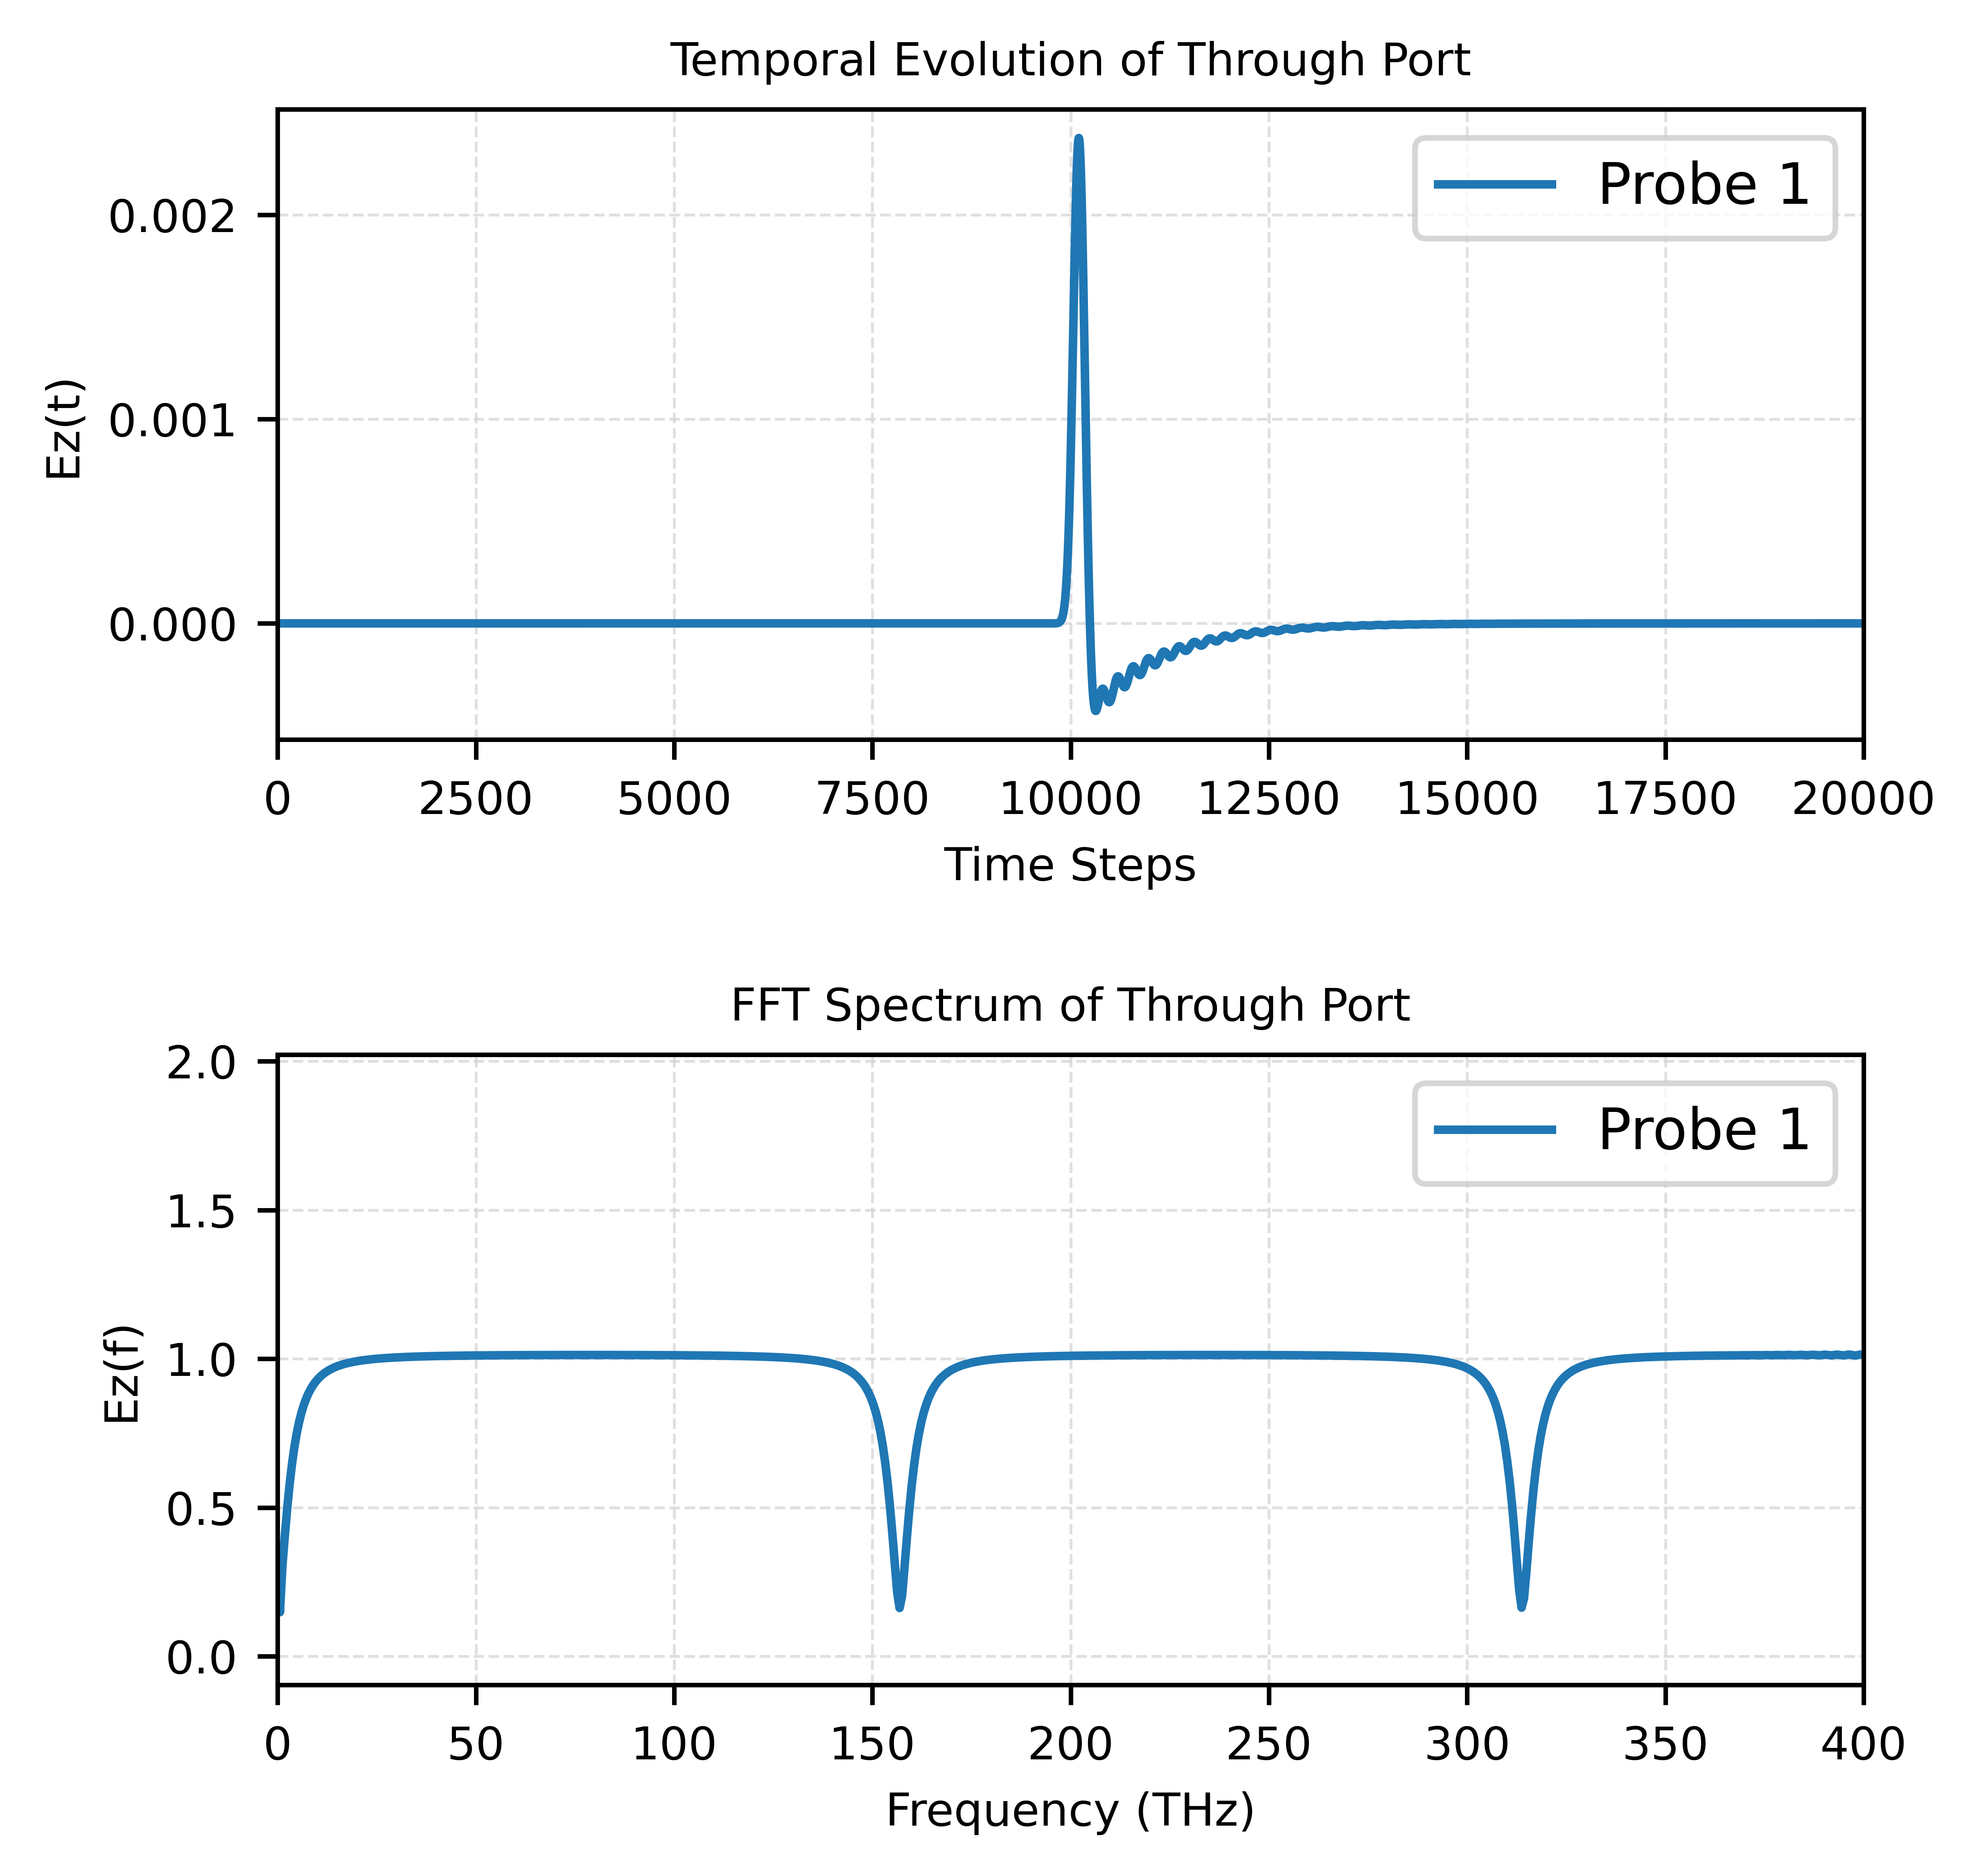

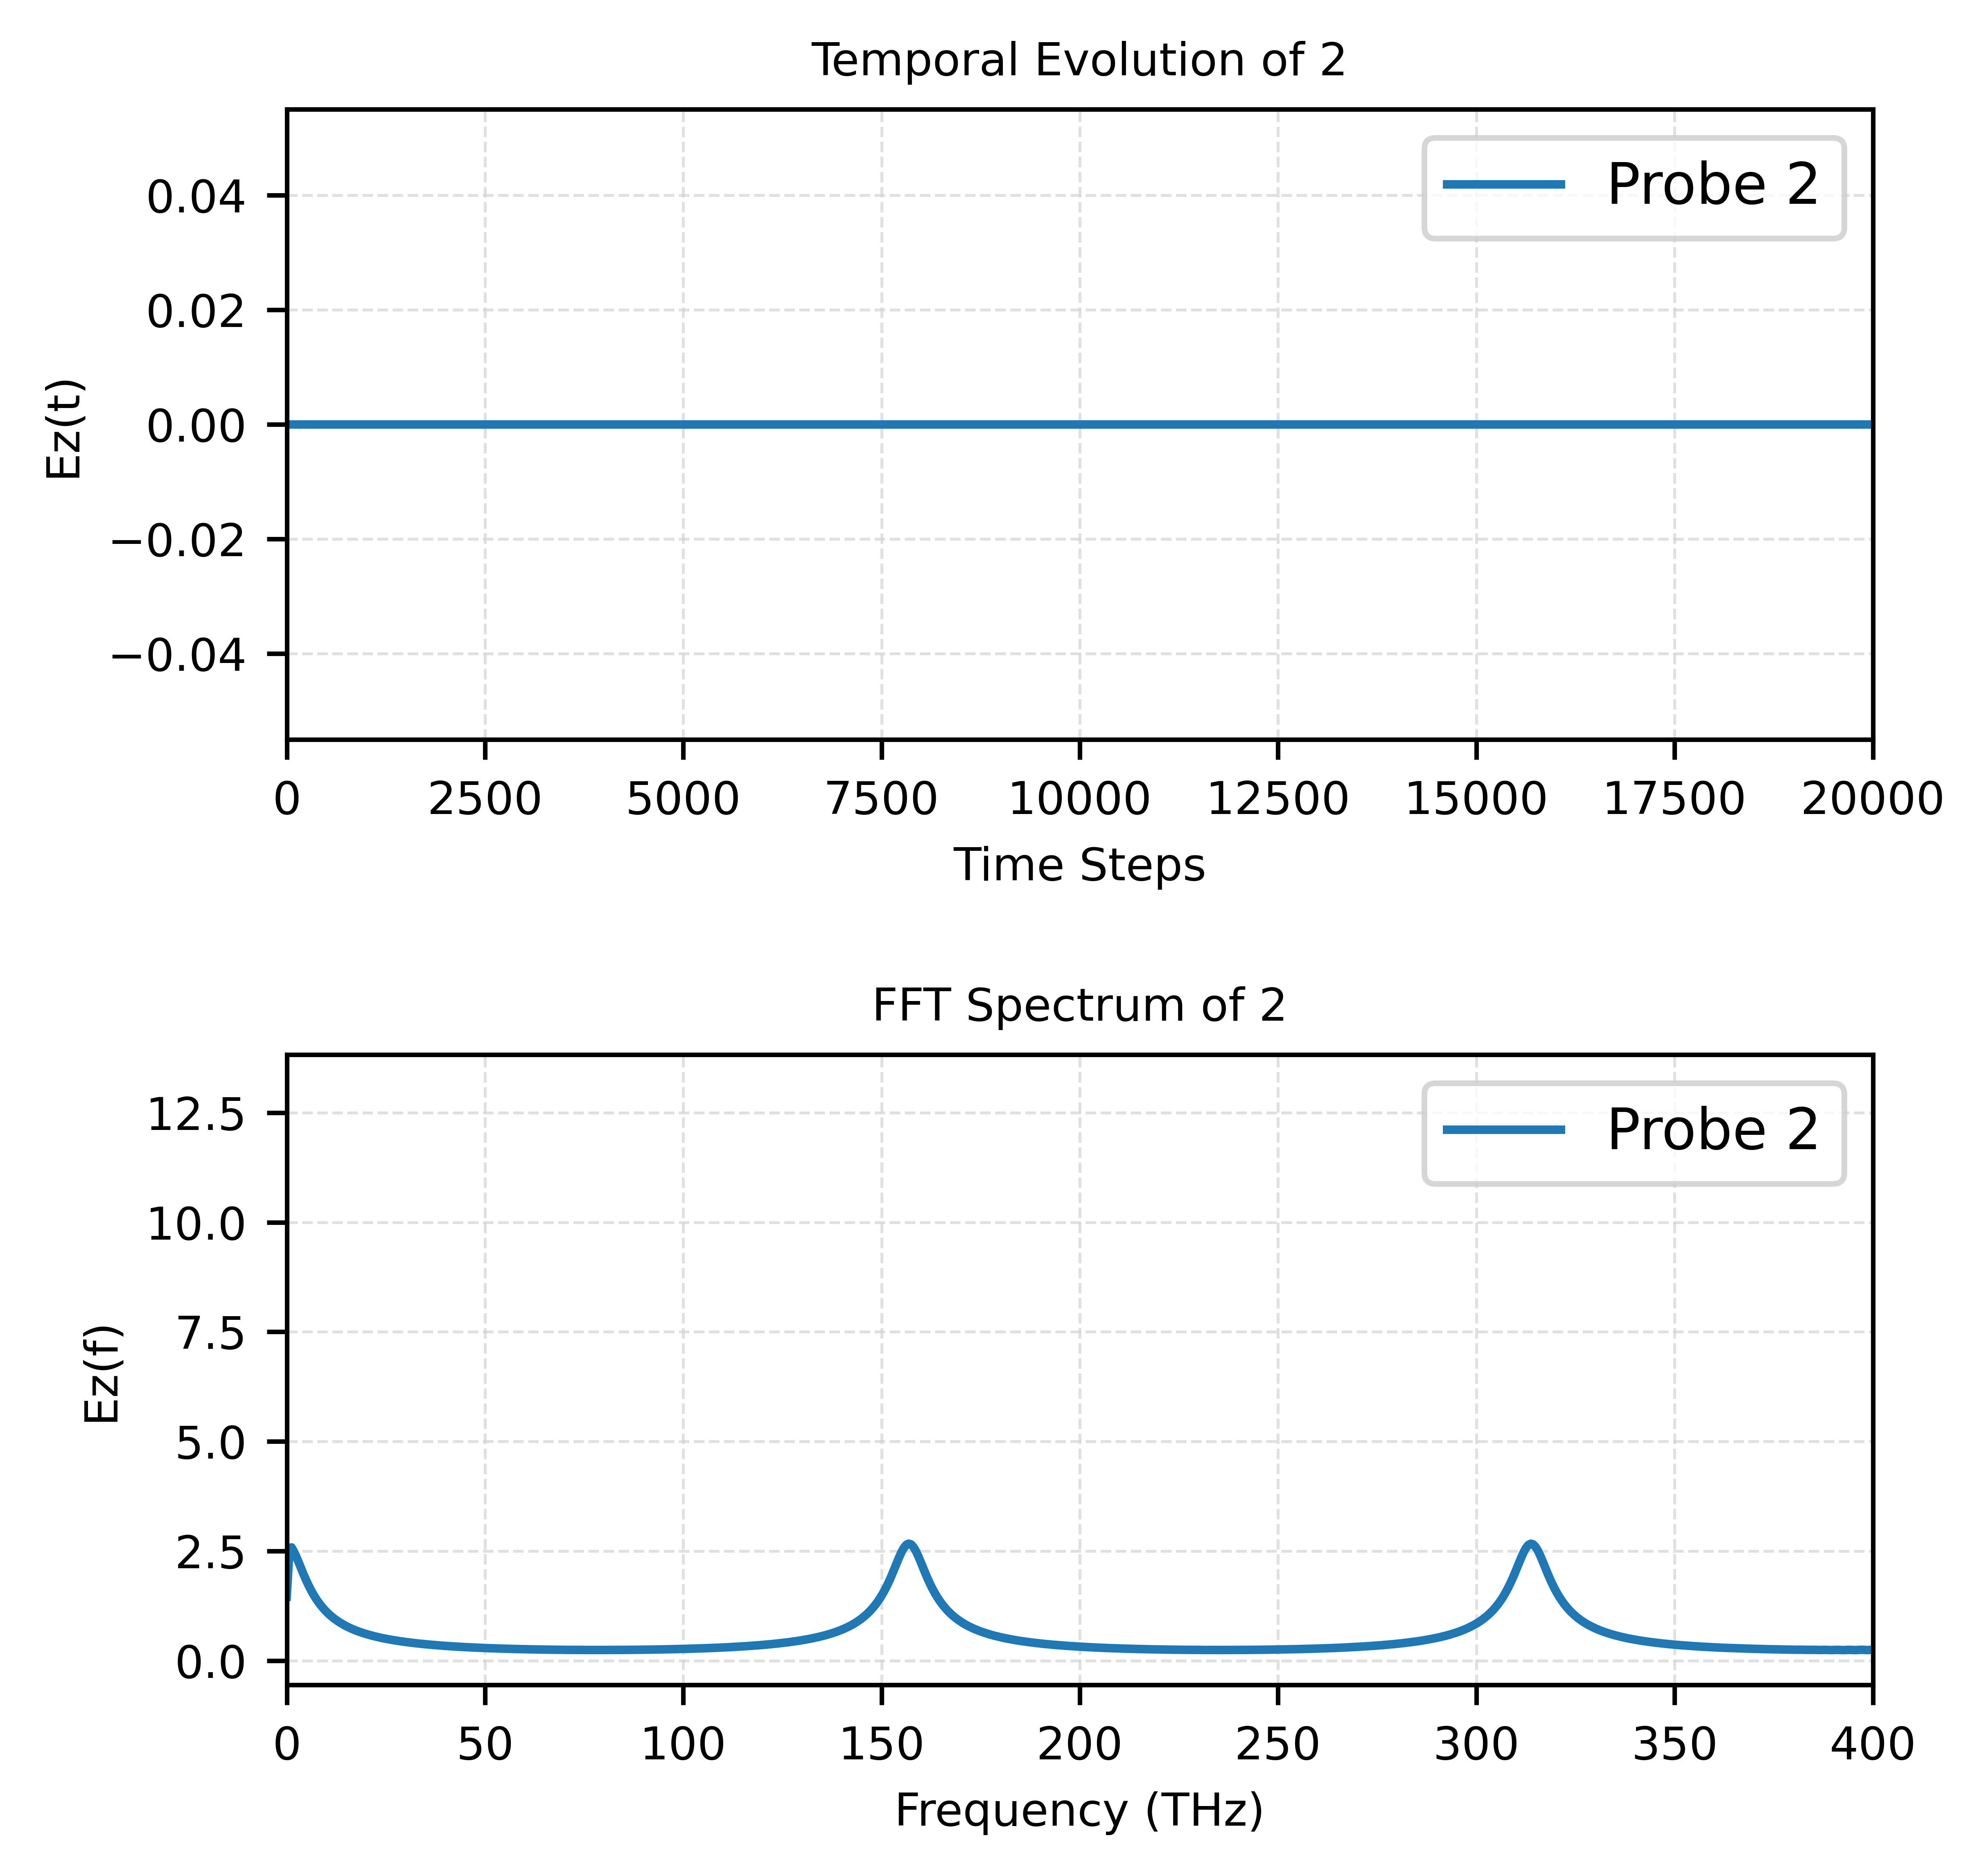

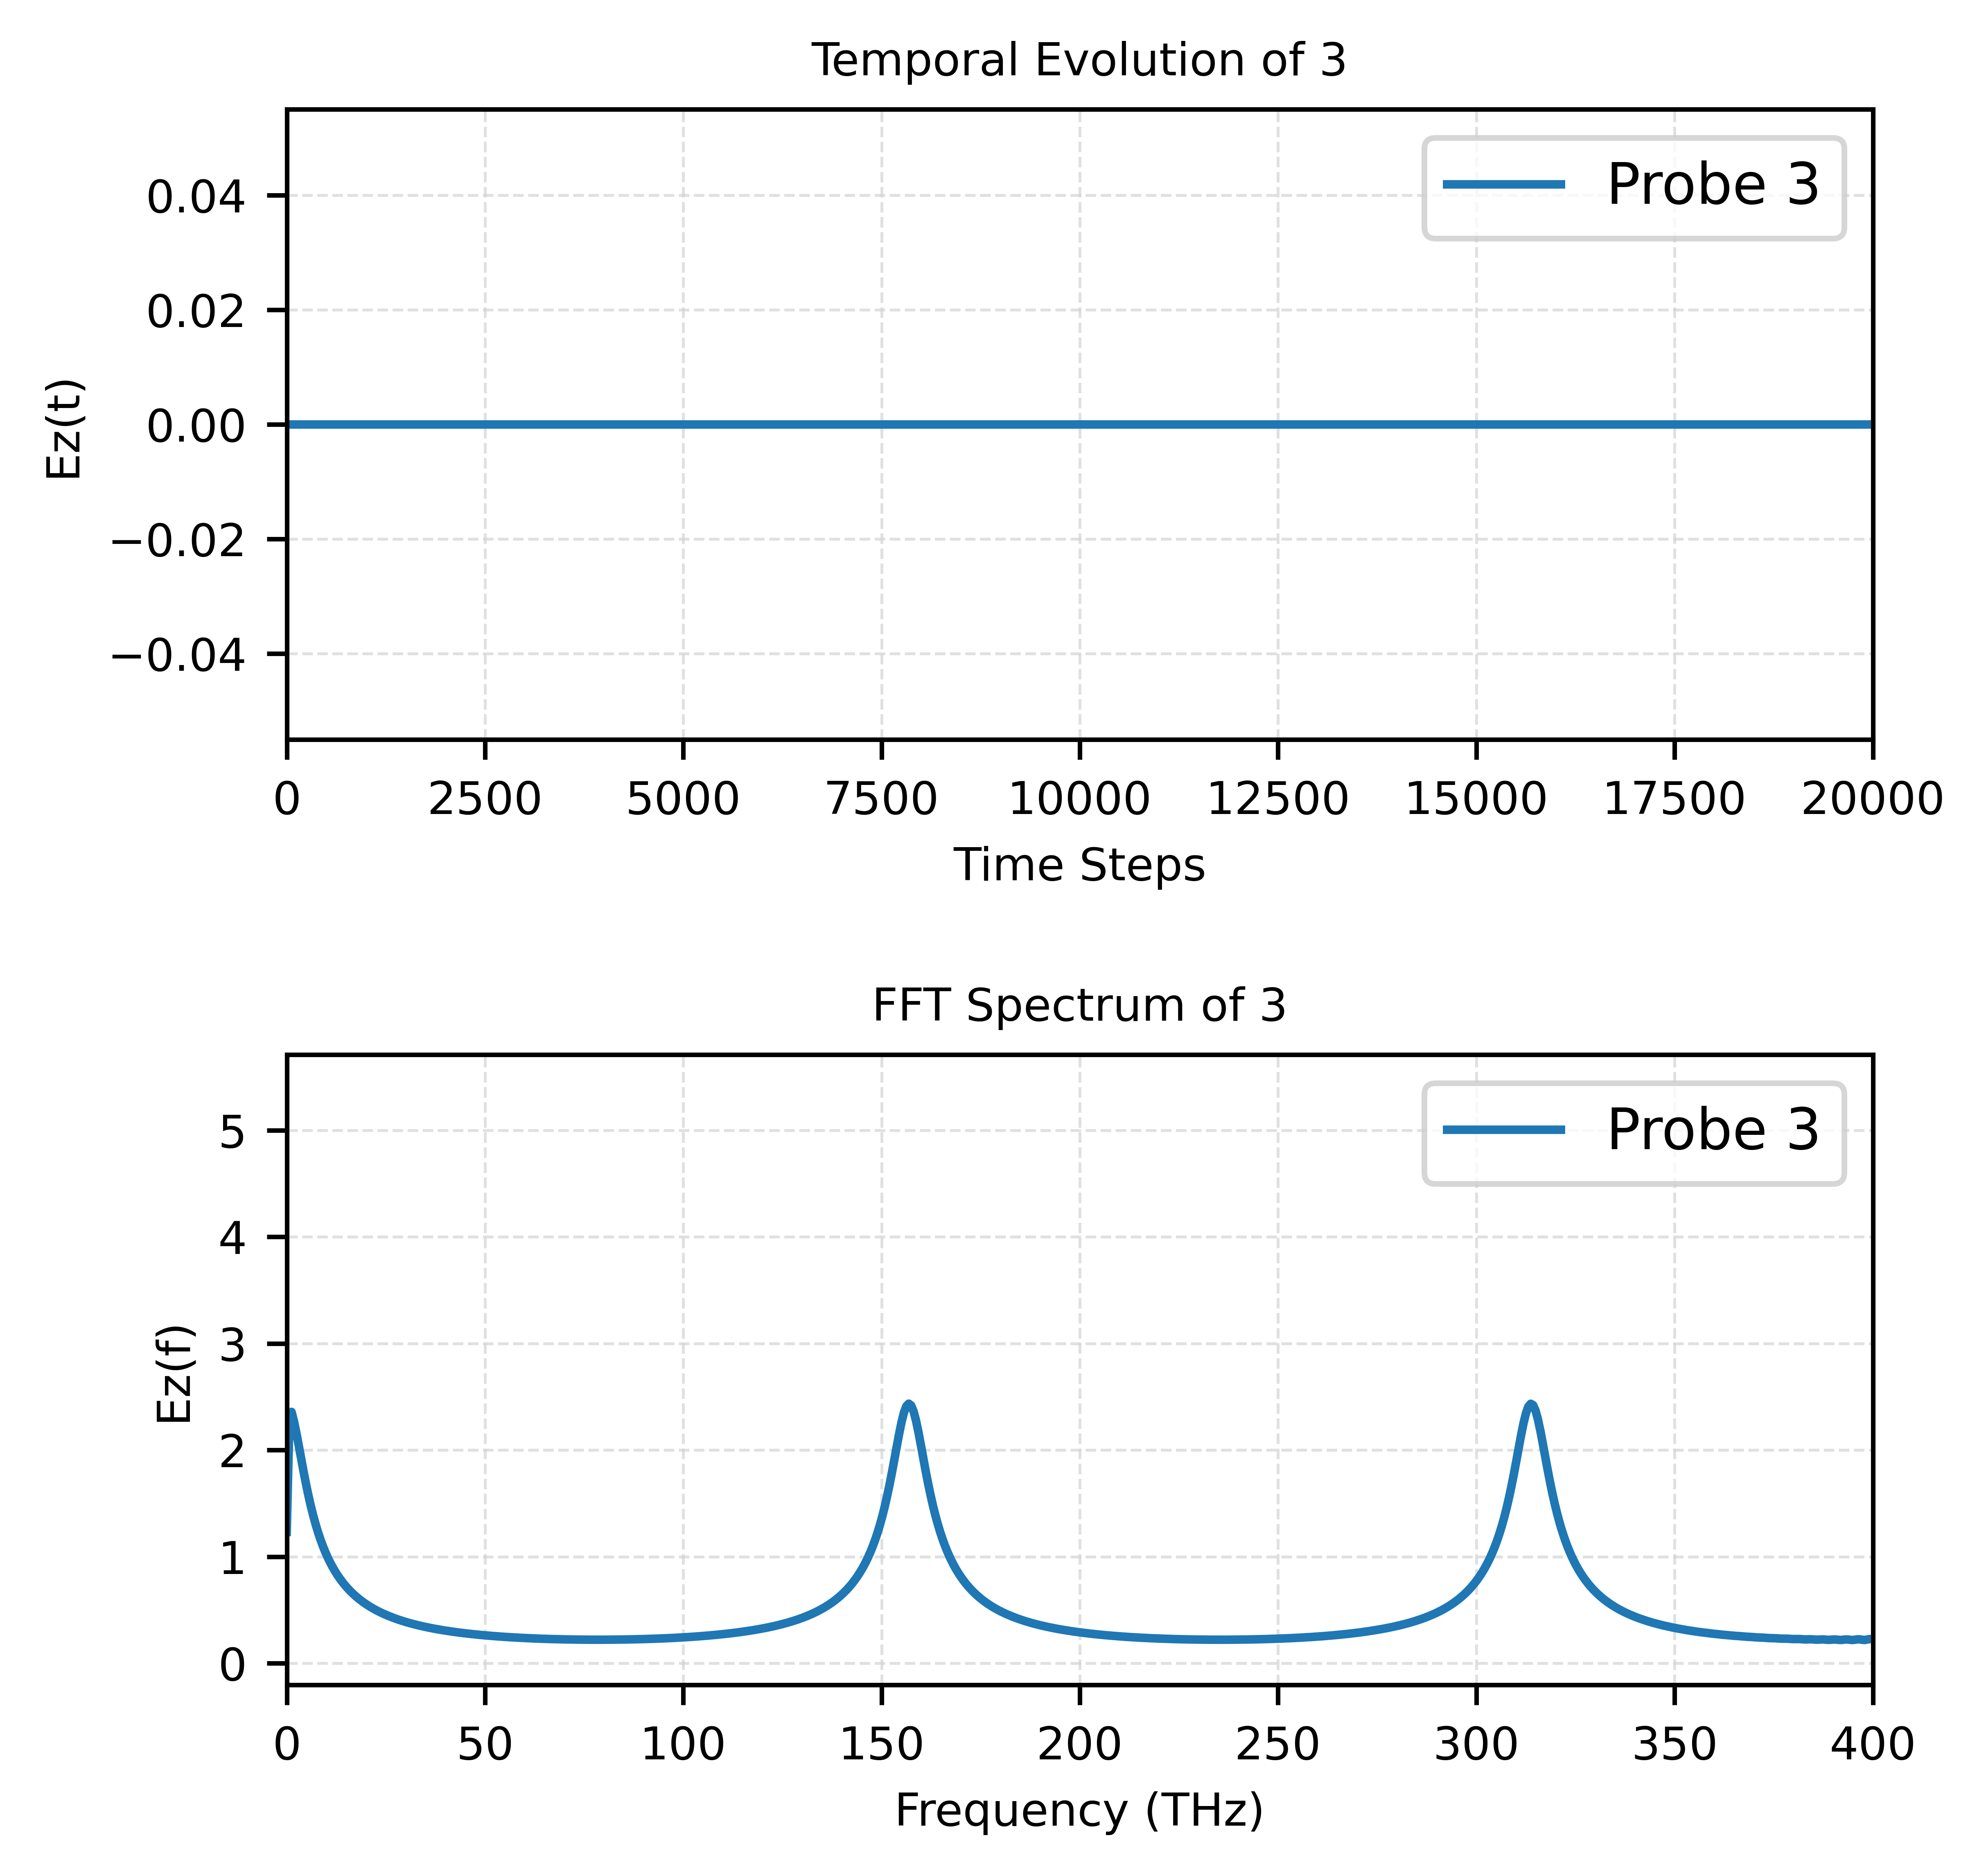

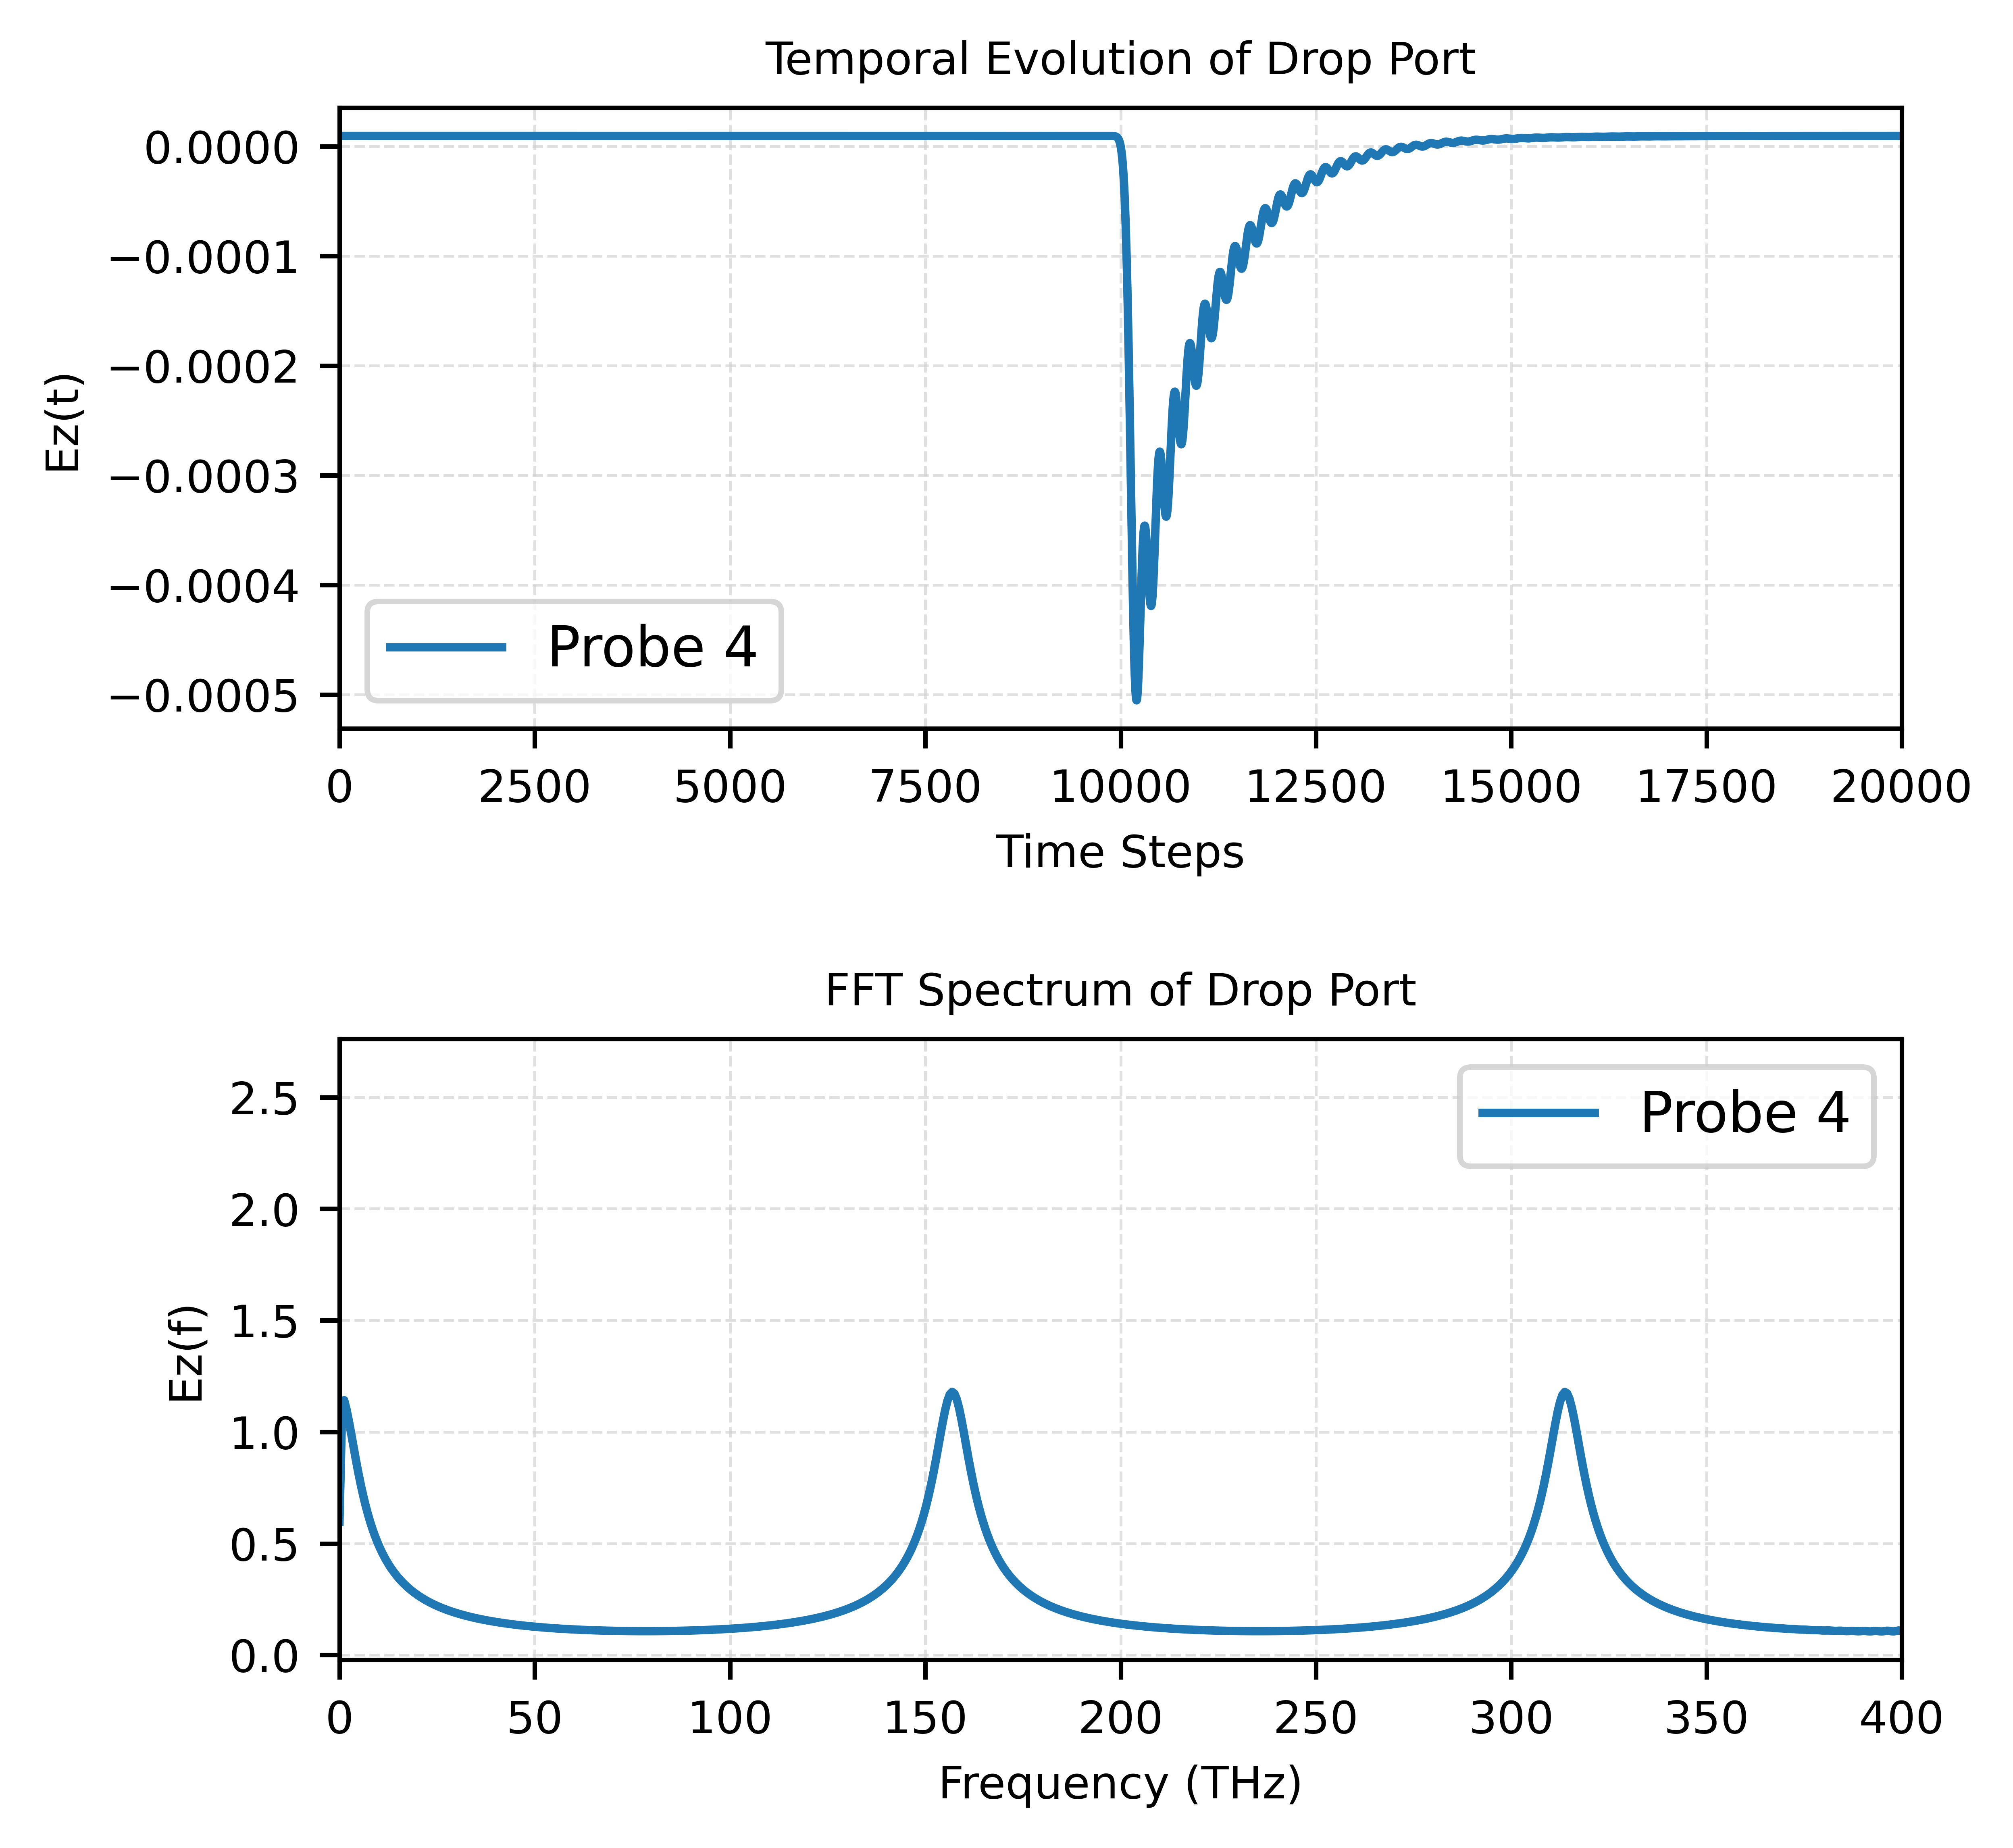

In [135]:
from matplotlib.pyplot import subplots_adjust
titles = ["Input Branch",
          "Through Port",
          "2",
          "3",
          "Drop Port"]

for ii in range(N_seg-1):
    plt.figure(figsize=(5,5), dpi=1000)

    # --- first subplot ---
    ax1 = plt.subplot(2,1,1)
    ax1.plot(np.real(Ez[:,ii]), label=f"Probe {ii}")
    ax1.set_xlim(0, 20000)
    ax1.set_title(f"Temporal Evolution of {titles[ii]}", fontsize=8)
    ax1.set_xlabel("Time Steps", fontsize=8)
    ax1.set_ylabel("Ez(t)", fontsize=8)
    ax1.tick_params(labelsize=8)
    ax1.legend()
    ax1.grid(True, which="both", color="lightgrey", linestyle="--", linewidth=0.5, alpha=0.7)

    # --- second subplot ---
    ax2 = plt.subplot(2,1,2)
    ax2.plot(freqs, np.abs(spectrum[:,ii]/spectrum[:,0]), label=f"Probe {ii}")
    ax2.set_xlim(0, 4e14)
    ax2.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f"{x/1e12:.0f}")
    )
    ax2.set_title(f"FFT Spectrum of {titles[ii]}", fontsize=8)
    ax2.set_xlabel("Frequency (THz)", fontsize=8)
    ax2.set_ylabel("Ez(f)", fontsize=8)
    ax2.tick_params(labelsize=8)
    ax2.legend()
    ax2.grid(True, which="both", color="lightgrey", linestyle="--", linewidth=0.5, alpha=0.7)

    # --- adjust subplot spacing ---
    plt.subplots_adjust(hspace=0.5)

    plt.show()

In [143]:
from scipy.signal import find_peaks

res_freq = []
signal = spectrum[:,1] #taking the through port

peaks, _ = find_peaks(signal)

res_freq = freqs[peaks]/1e12

# # Example: take one probe (say ii=0)
# spec = np.abs(spectrum[:, 1])
# spec /= np.max(spec)  # normalize

# # find peaks above 10% of max, with min spacing
# peaks, _ = find_peaks(spec, height=0.1, distance=10)

# # Extract resonant freqs in Hz
# resonant_freqs = freqs[peaks]

# # Convert to THz for readability
# resonant_freqs_THz = resonant_freqs / 1e12

print("Resonant frequencies (THz):", res_freq)


Resonant frequencies (THz): [   16.95827048   164.13183213   319.17887651 ... 15134.04509706
 15135.2564021  15136.46770713]


(6, 50000, 100)
6


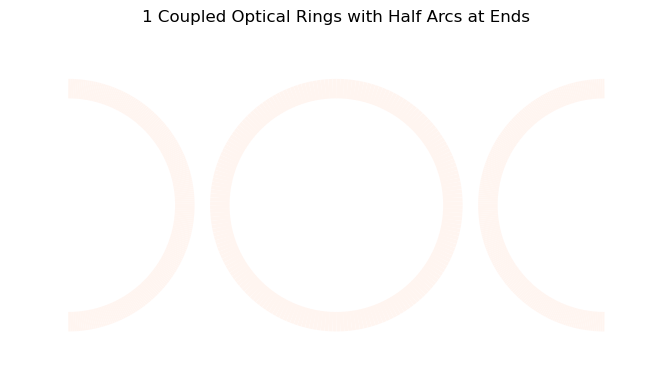

6


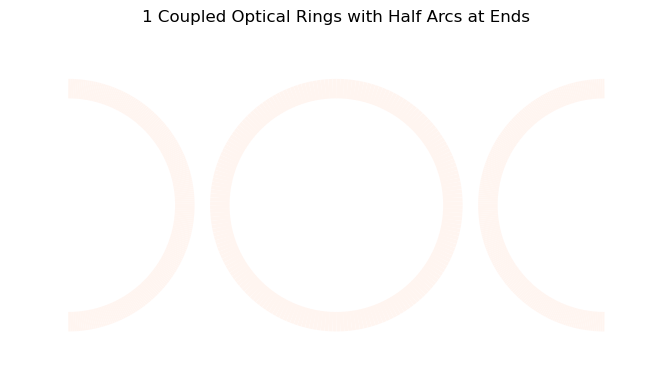

6


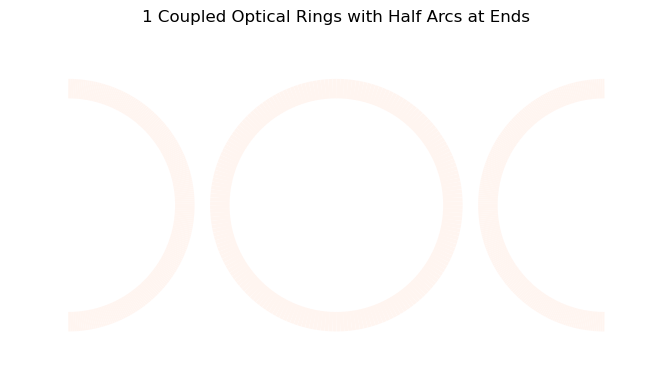

6


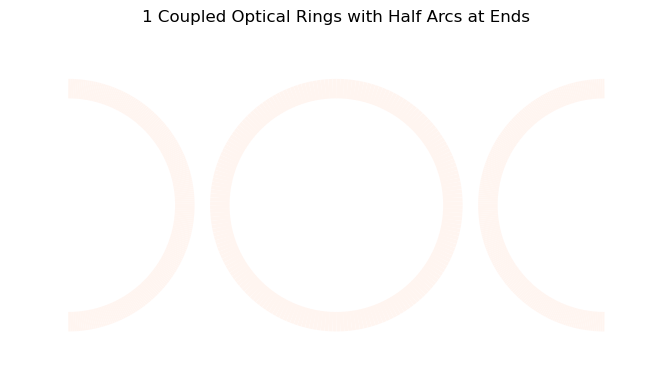

6


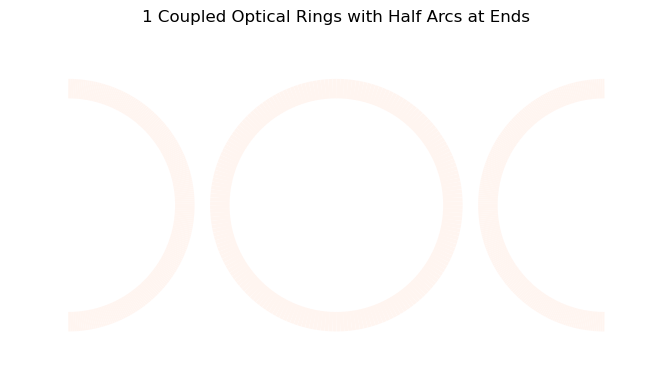

6


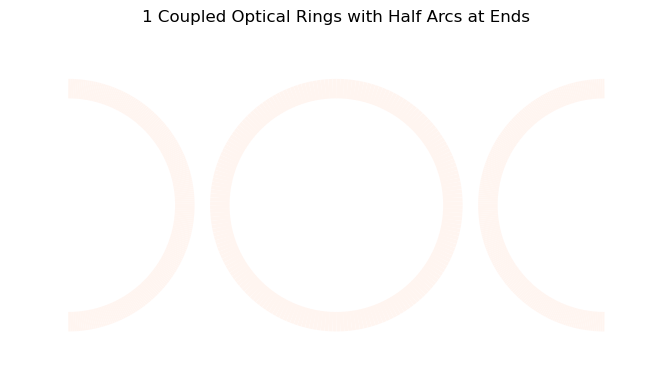

6


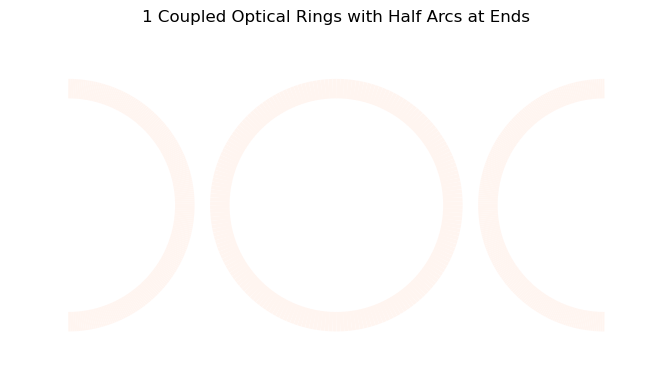

6


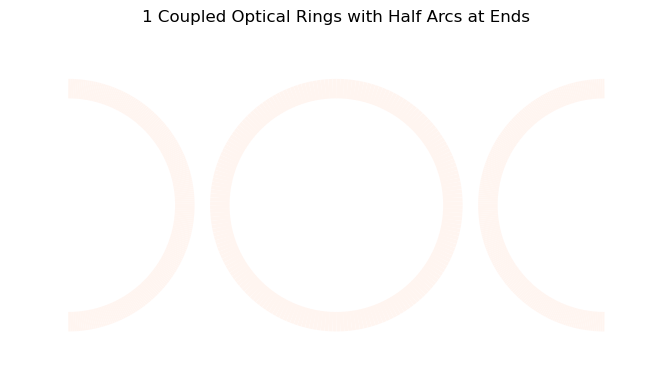

6


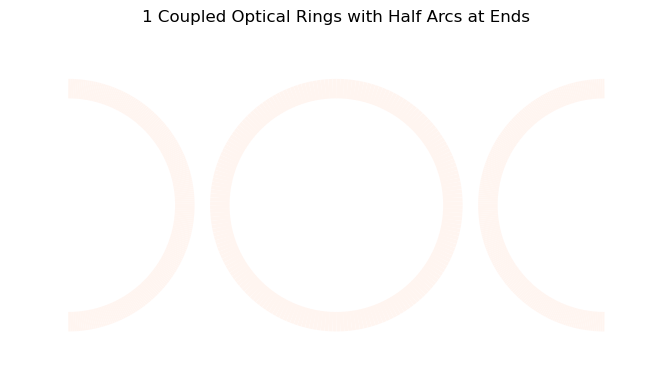

6


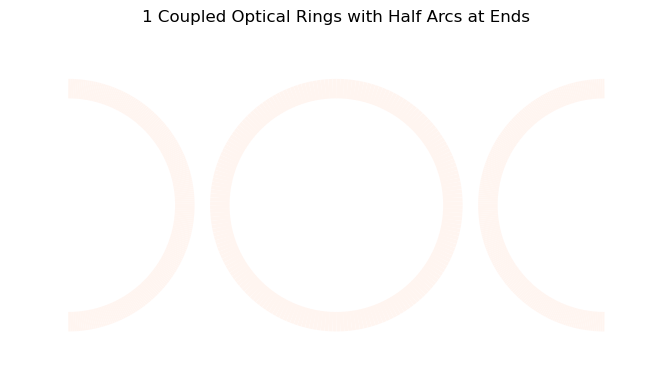

In [81]:
# Parameters
ez_tab_ordered = np.zeros((N_seg, maxTime, SIZE), dtype = complex)
for ring in range(rings_no):
    if ring%2 == 0: #even segment
        ez_tab_ordered[(2*ring),:,:] = ez_tab[2*ring + 1,:,:]
        ez_tab_ordered[(2*ring)+1,:,:] = ez_tab[2*ring,:,:]
    else:
        ez_tab_ordered[(2*ring),:,:] = ez_tab[2*ring,:,:]
        ez_tab_ordered[(2*ring)+1,:,:] = ez_tab[2*ring + 1,:,:]
        
print(np.shape(ez_tab_ordered))


for tp in range(1000,2000,100):
    ez_tab_tp = ez_tab_ordered[:,tp,:]      
    plot_field_ring(ez_tab_tp, rings_no)

In [80]:
#while coupling I used different indices so in order for the arc plotting function to stack the electric fields in the order they were coupled, I made this logic.

for ring in range(rings_no):
    if ring%2 ==0:
        print(2*ring, 2*ring +1)
        print(2*ring+1, 2*ring)
    else:
        print(2*ring, 2*ring +1)
        print(2*ring, 2*ring +1)

0 1
1 0
2 3
2 3
4 5
5 4
